## Библиотека pandas. Упражнения.

In [1]:
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
values = {
    "Glucose": pima["Glucose"].median(),
    "BloodPressure": pima["BloodPressure"].median(),
    "SkinThickness": pima["SkinThickness"].median(),
    "Insulin": pima["Insulin"].median(),
    "BMI": pima["BMI"].mean()
}

pima.fillna(value=values, inplace=True)

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.loc[(pima.Age > 50) & (pima.Class == 1)].shape[0]

38

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [7]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.sort_values(by=["Pregnancies"], ascending=False)[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [8]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.loc[(pima.Age >=30) & (pima.Age <= 40) & (pima.Pregnancies >= 3)].shape[0]

142

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
len(pima.loc[(pima.BloodPressure >= 80) & (pima.BloodPressure <= 89)]) / len(pima) * 100

18.880208333333336

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
len(pima.loc[(pima.BMI >= 30) & (pima.BloodPressure > pima.BloodPressure.mean())])

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [11]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
healthy = pima.loc[pima.Class == 0, "Glucose"].mean()
ill = pima.loc[pima.Class == 1, "Glucose"].mean()
print(f"Среднее значение 'Glucose' для больных диабетом: {ill}, для здоровых: {healthy}")

Среднее значение 'Glucose' для больных диабетом: 142.13059701492537, для здоровых: 110.682


In [12]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
healthy = pima.loc[pima.Class == 0, "BloodPressure"].mean()
ill = pima.loc[pima.Class == 1, "BloodPressure"].mean()
print(f"Среднее значение 'BloodPressure' для больных диабетом: {ill}, для здоровых: {healthy}")

Среднее значение 'BloodPressure' для больных диабетом: 75.1231343283582, для здоровых: 70.92


In [13]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
healthy = pima.loc[pima.Class == 0, "Insulin"].mean()
ill = pima.loc[pima.Class == 1, "Insulin"].mean()
print(f"Среднее значение 'Insulin' для больных диабетом: {ill}, для здоровых: {healthy}")

Среднее значение 'Insulin' для больных диабетом: 164.70149253731344, для здоровых: 127.792


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

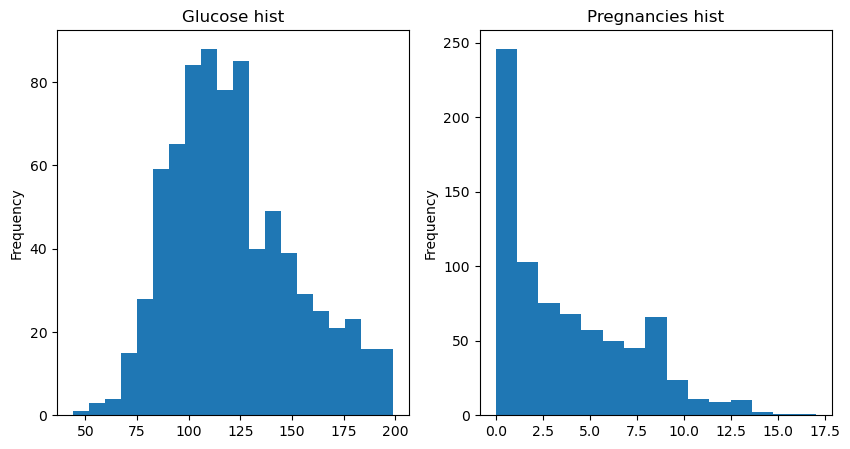

In [14]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

pima.Glucose.plot(
    kind='hist',
    bins=20,
    ax=ax1,
    title='Glucose hist'
)

pima.Pregnancies.plot(
    kind='hist',
    bins=15,
    ax=ax2,
    title='Pregnancies hist'
)

plt.show()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

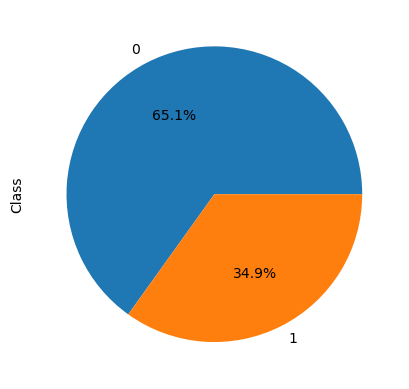

In [15]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima.groupby('Class').size().plot(kind='pie', autopct=lambda x: f'{x:.1f}%', ylabel='Class')
plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

(18.0, 84.0)


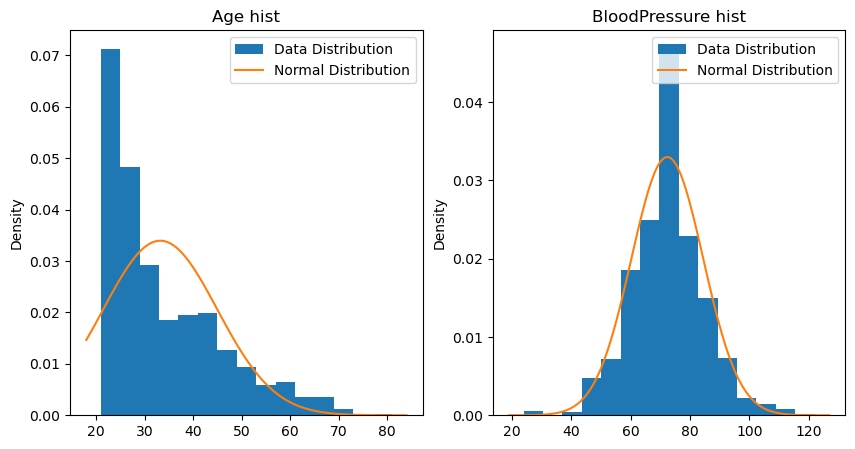

In [16]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
import numpy as np


mu_age, std_age = norm.fit(pima.Age)
mu_bp, std_bp = norm.fit(pima.BloodPressure)

fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

pima.Age.plot(
    kind='hist',
    bins=15,
    density=True,
    ax=ax1,
    label='Data Distribution',
    title='Age hist'
)

pima.BloodPressure.plot(
    kind='hist',
    bins=15,
    density=True,
    ax=ax2,
    label='Data Distribution',
    title='BloodPressure hist'
)
print(ax1.get_xlim())
age_lims = np.linspace(*ax1.get_xlim(), 100)
bp_lims = np.linspace(*ax2.get_xlim(), 100)
age_pdf = norm.pdf(age_lims, mu_age, std_age)
bp_pdf = norm.pdf(bp_lims, mu_bp, std_bp)

ax1.plot(age_lims, age_pdf, label='Normal Distribution')
ax2.plot(bp_lims, bp_pdf, label='Normal Distribution')

ax1.set_ylabel('Density')
ax2.set_ylabel('Density')

ax1.legend()
ax2.legend()

plt.show()

__Задание 13.__

Постройте следующий график: доля больных диабетом в зависимости от числа беременностей.

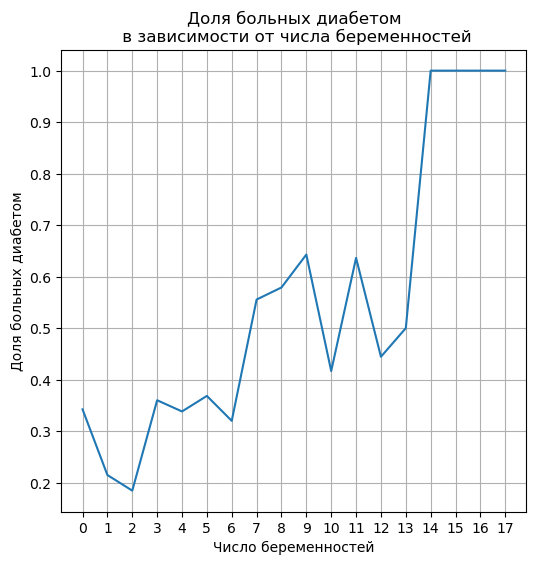

In [17]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

(pima.groupby('Pregnancies')['Class'].sum() / pima.groupby('Pregnancies')['Class'].count()).plot(
    ax=ax,
    title='Доля больных диабетом\n в зависимости от числа беременностей'
)

ax.set_xlabel('Число беременностей')
ax.set_ylabel('Доля больных диабетом')
ax.set_xticks(np.arange(0, 18, 1))
ax.grid()

plt.show()

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [18]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
pima["wasPregnant"] = pima["Pregnancies"].apply(lambda x: 1 if x >= 1 else 0)
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [19]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
mask = pima.wasPregnant == 1

was_pregnant = pima.loc[mask, 'Class']
print("Доля больных диабетом среди женщин, которые были беременны: ", \
      f"{was_pregnant.sum() / len(was_pregnant) * 100:.2f}")

wasnt_pregnant = pima.loc[~mask, 'Class']
print("Доля больных диабетом среди женщин, которые не были беременны: " \
      f"{wasnt_pregnant.sum() / len(wasnt_pregnant) * 100:.2f}")

Доля больных диабетом среди женщин, которые были беременны:  35.01
Доля больных диабетом среди женщин, которые не были беременны: 34.23


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [20]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
def BMI_category(x):
    if x < 18.5:
        return 'Underweight'
    if x >= 18.5 and x <= 24.9:
        return 'Normal weight'
    if x >= 25 and x <= 29.9:
        return 'Overweight'
    if x >= 30:
        return 'Obesity'
    
pima["bodyType"] = pima["BMI"].apply(BMI_category)
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [21]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# Возьмем в качестве "нормального" кровяное давление, которое лежит
# в диапазоне одного стандартного отклонения

min_normal = pima.BloodPressure.mean() - pima.BloodPressure.std()
max_normal = pima.BloodPressure.mean() + pima.BloodPressure.std()
min_normal, max_normal

(60.29007701602186, 84.48336048397815)

In [22]:
healthy = pima.loc[(pima.BloodPressure >= min_normal) & (pima.BloodPressure <= max_normal) & (pima.bodyType == 'Normal weight')]

db_percent = len(healthy.loc[healthy.Class == 1]) / len(healthy.loc[healthy.Class == 0]) * 100

print(f"{ill:.2f} % 'здоровых' женщин больны диабетом")

164.70 % 'здоровых' женщин больны диабетом


# Датасет 2


In [23]:
babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt', index_col=0)

## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет

2) Какое имя в датасете находится по индексом 121?

3) Cколько всего родилось детей по имени 'Aaron' за все время?

4) Насколько больше за все время родилось мальчиков чем девочек?

5) Cколько мальчиков родилось в 2010?

6) Сколько в датасете девочек по имени John?


In [24]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
babies.head(5)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [25]:
# 1. Какие годы включает датасет

babies.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [26]:
# 2. Какое имя в датасете находится по индексом 121?

babies.iloc[121]["name"]

'Ann'

In [27]:
# 3. Cколько всего родилось детей по имени 'Aaron' за все время?

babies.loc[babies["name"] == "Aaron", "number"].sum()

527668

In [28]:
# 4. Насколько больше за все время родилось мальчиков чем девочек?
print(babies.groupby("sex")["number"].sum())
girls, boys = babies.groupby("sex")["number"].sum()
print(f"За все время родилось больше мальчиков ({boys} против {girls}) на {boys - girls} человек, " \
      f"или на {((boys / girls * 100) - 100):.2f} %.")

sex
F    159990140
M    162412587
Name: number, dtype: int64
За все время родилось больше мальчиков (162412587 против 159990140) на 2422447 человек, или на 1.51 %.


In [29]:
# 5. Cколько мальчиков родилось в 2010?

babies.loc[(babies["sex"] == "M") & (babies["year"] == 2010), "number"].sum()

1898382

In [30]:
# 6. Сколько в датасете девочек по имени John?

babies.loc[(babies["name"] == "John") & (babies["sex"] == "F"), "number"].sum()

21578

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


In [31]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# 1. Сгруппируйте набор данных babies по году и полу
# и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

# Для последующих задач мне показалось удобнее провести  группировку с агр. функцией count() на
# любом из столбцов, а затем по индексу верхнего уровня разбить результат на мальчиков и девочек.
grouped = babies.groupby(["sex", "year"])["number"].sum()
baby_girls = grouped.loc["F"]
baby_boys = grouped.loc["M"]

baby_girls

year
1880      90993
1881      91955
1882     107851
1883     112322
1884     129021
         ...   
2006    1896468
2007    1916888
2008    1883645
2009    1827643
2010    1759010
Name: number, Length: 131, dtype: int64

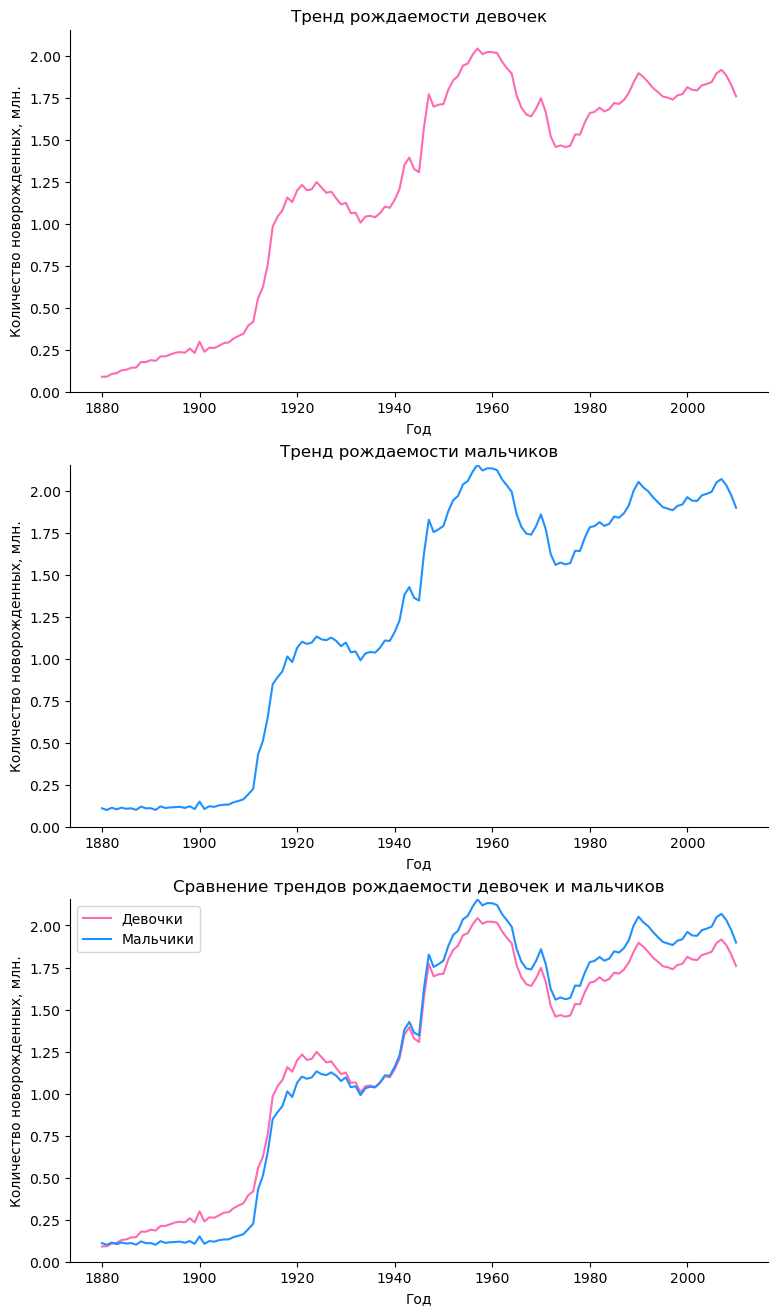

In [32]:
# Задания 2-5

fig, [ax0, ax1, ax2] = plt.subplots(3, 1)
fig.set_size_inches(9, 16)

boys_color = 'dodgerblue'
girls_color = 'hotpink'


# Делим значения по оси Y на 10^6 для удобства восприятия
baby_girls = baby_girls / 1000000
baby_boys = baby_boys / 1000000

# 1 Plot
ax0.plot(baby_girls.index, baby_girls.values, c=girls_color)
ax0.set_title('Тренд рождаемости девочек')

# 2 Plot
ax1.plot(baby_boys.index, baby_boys.values, c=boys_color)
ax1.set_title('Тренд рождаемости мальчиков')

# 3 Plot
ax2.plot(baby_girls.index, baby_girls.values, c=girls_color, label='Девочки')
ax2.plot(baby_boys.index, baby_boys.values, c=boys_color, label='Мальчики')
ax2.set_title('Сравнение трендов рождаемости девочек и мальчиков')
ax2.legend()


for ax in [ax0, ax1, ax2]:
    # Добавляем подписи к осям
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество новорожденных, млн.')
    
    # Ограничиваем шкалу Y
    ax.set_ylim(0, max(baby_girls.max(), baby_boys.max()))
    
    # Убираем правую и верхнюю границы
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.show()

На графике виден бурный рост рождаемости, начавшийся с десятых годов 20-го века. Рождалось в этот период девочек больше, чем мальчиков, что необычно, так как далее на протяжении всего тренда девочек рождется меньше. В период приблизительно с 30-ых годов начинается довольно продолжительный спад, который, однако, уже вначале сороковых годов сменился на бурный рост, несмотря на Вторую мировую войну. Максимальное число новорожденных в год приходится примерно на 60-е — 70-е года, после которых начался резкий глубокий спад. Причин тому может быть множество, для каждого государства они наверняка разнятся, среди основных могу предположить появление более надежных средств контрацепции, легализация абортов, новые культуры, движения и обычаи в обществе. После этого спада, начиная с 80-х годов рождаемость растет небыстро, но относительно ровно вплоть до конца 00-х годов 21 века, где график оканчивается очередным резким падением.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.

In [33]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# 1. Сгруппируйте нужным способом датафрейм babies
# и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

grouped = babies.groupby(["sex", "name"])["number"].sum().sort_values(ascending=False)
most_popular_girls = grouped.loc["F"][:2]
most_popular_boys = grouped.loc["M"][:2]

print(most_popular_girls)
print()
print(most_popular_boys)

name
Mary        4103935
Patricia    1568742
Name: number, dtype: int64

name
James    5049727
John     5040319
Name: number, dtype: int64


In [34]:
# 2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa
# и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

babies_mary = babies.loc[(babies["sex"] == "F") & (babies["name"] == "Mary")].groupby("year")["number"].sum()
babies_patricia = babies.loc[(babies["sex"] == "F") & (babies["name"] == "Patricia")].groupby("year")["number"].sum()

babies_james = babies.loc[(babies["sex"] == "M") & (babies["name"] == "James")].groupby("year")["number"].sum()
babies_john = babies.loc[(babies["sex"] == "M") & (babies["name"] == "John")].groupby("year")["number"].sum()

babies_john

year
1880     9655
1881     8769
1882     9557
1883     8894
1884     9387
        ...  
2006    15140
2007    14405
2008    13273
2009    12048
2010    11424
Name: number, Length: 131, dtype: int64

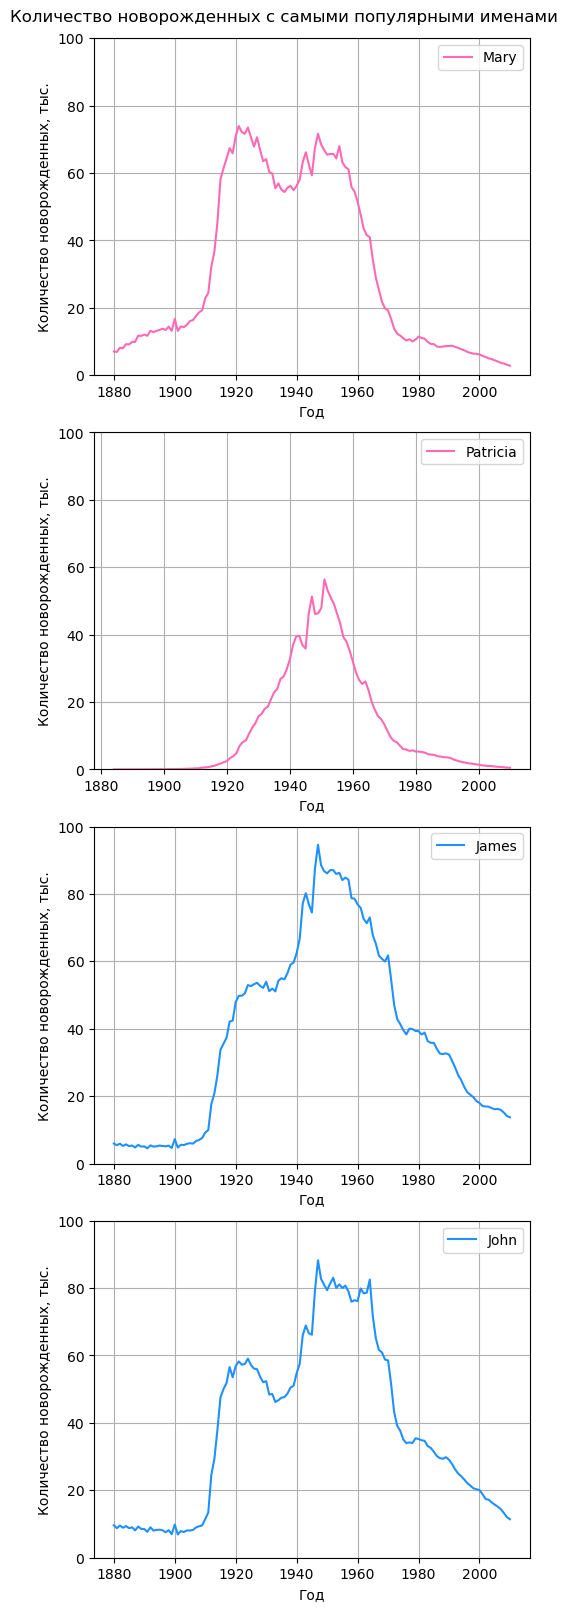

In [35]:
# Задания 3-6

fig, axes = plt.subplots(4, 1, constrained_layout=True)
fig.set_size_inches(5, 16)
fig.suptitle('Количество новорожденных с самыми популярными именами')

labels = ["Mary", "Patricia", "James", "John"]
colors = (color for color in ('#FF69B4', '#FF69B4', '#1E90FF', '#1E90FF'))
dfs = [babies_mary, babies_patricia, babies_james, babies_john]
dfs = list(map(lambda x: x / 1000, dfs))
ylim = max(list(map(max, dfs)))

for ax, df, label in zip(axes, dfs, labels):

    df.plot(ax=ax, label=label, color=next(colors))
    
    ax.legend()
    
    ax.set_ylabel("Количество новорожденных, тыс.")
    ax.set_xlabel("Год")
    
    ax.set_ylim(0, ylim)
    ax.set_yticks(list(range(0, int(ylim)+20, 20)))
    
    ax.grid()
    
plt.show()

- **Mary**: У тренда наблюдаются две вершины в области пика популярности этого имени. Имя имело некоторую популярность изначально, однако количество новорожденных с именем Mary начало бешенно расти начиная с 10-х годов 20-го века, тренд достиг пика к 20-му году, и слега упал, а затем вырос обратно к 50-му году, после чего резко обвалился и продолжил плавный спад до конца графика.

- **Patricia**: Тренд имеет очевидный, ярко выраженный пик посредине. Будучи абсолютно непопулярным, это имя начало стремительно набирать с 20-х годов, достигнув пика к 50-м, а затем так же стремительно обрушилось вниз.

- **James**: Имя обрело сумасшедшую популярность в 10-е года 20 века, которая только росла (с небольшим плато) до 50-х годов. На протяжении оставшегося графика популярность уверенно падает вниз.

- **John**: Популярность этого имени на протяжении всей истории ведет себя аналогично таковой у имени James, разве что вместо плато в районе 30-х годов наблюдается небольшой спад, да и в целом масштабы несколько меньше.